# 실무예제 4-3

## 다음은 2016년도 서울시 일별 대기오염도 정보 중 일부이다. 이산화질소, 오존, 일산화탄소, 아황산가스의 농도 및 미세먼지, 초미세먼지 측정치를 대상으로 웨이블릿 변환을 통하여 각각 데이터를 축소시키시오.

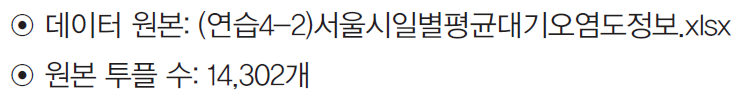
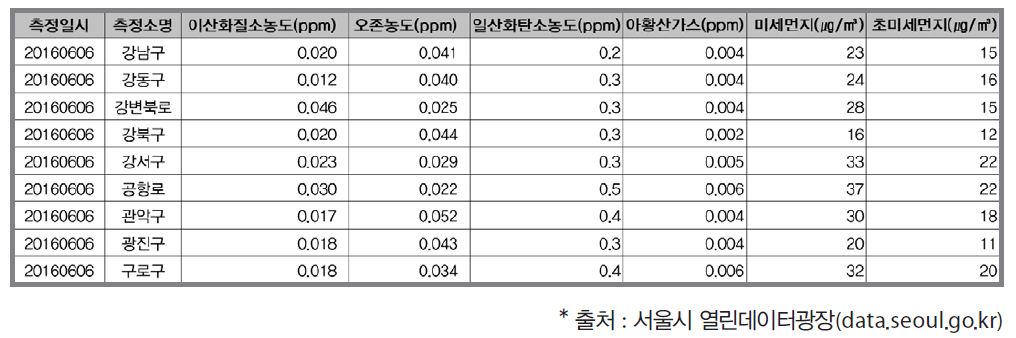

In [1]:
# ex4-3.ipynb
import pandas as pd
import numpy as np
import pywt  # Discrete Wavelete Transform을 위한 패키지

# 데이터로드 ((연습4-2)서울시일별평균대기오염도정보.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('연습문제파일/(연습4-2)서울시일별평균대기오염도정보.csv', encoding='CP949', engine='python')

In [2]:
rawData

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
5,20160606,공항로,0.030,0.022,0.5,0.006,37.0,22.0
6,20160606,관악구,0.017,0.052,0.4,0.004,30.0,18.0
7,20160606,광진구,0.018,0.043,0.3,0.004,20.0,11.0
8,20160606,구로구,0.018,0.034,0.4,0.006,32.0,20.0
9,20160606,금천구,0.022,0.047,0.3,0.003,26.0,17.0


In [3]:
# 결측값 채우기 (클래스의 평균으로 채움. 클래스 기준 : 측정소명)
rawData.fillna(rawData.groupby('측정소명').transform('mean'), inplace=True)

In [4]:
rawData

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020000,0.041000,0.200000,0.004000,23.000000,15.000000
1,20160606,강동구,0.012000,0.040000,0.300000,0.004000,24.000000,16.000000
2,20160606,강변북로,0.046000,0.025000,0.300000,0.004000,28.000000,15.000000
3,20160606,강북구,0.020000,0.044000,0.300000,0.002000,16.000000,12.000000
4,20160606,강서구,0.023000,0.029000,0.300000,0.005000,33.000000,22.000000
5,20160606,공항로,0.030000,0.022000,0.500000,0.006000,37.000000,22.000000
6,20160606,관악구,0.017000,0.052000,0.400000,0.004000,30.000000,18.000000
7,20160606,광진구,0.018000,0.043000,0.300000,0.004000,20.000000,11.000000
8,20160606,구로구,0.018000,0.034000,0.400000,0.006000,32.000000,20.000000
9,20160606,금천구,0.022000,0.047000,0.300000,0.003000,26.000000,17.000000


In [5]:
# 대기오염 측정치(이산화질소농도, 오존농도, 일산화탄소농도, 아황산가스, 미세먼지, 초미세먼지)를 대상으로 multi-level 웨이블릿변환함수 wavedec() 적용
# rawData를 1차원 배열(array)로 변환
wavelete_src = []
wavelete_src.extend(rawData.loc[:,'이산화질소농도'])
wavelete_src.extend(rawData.loc[:,'오존농도'])
wavelete_src.extend(rawData.loc[:,'일산화탄소농도'])
wavelete_src.extend(rawData.loc[:,'아황산가스'])
wavelete_src.extend(rawData.loc[:,'미세먼지'])
wavelete_src.extend(rawData.loc[:,'초미세먼지'])

In [6]:
wavelete_src

[0.02,
 0.012,
 0.046,
 0.02,
 0.023,
 0.03,
 0.017,
 0.018000000000000002,
 0.018000000000000002,
 0.022000000000000002,
 0.016,
 0.027000000000000003,
 0.018000000000000002,
 0.022000000000000002,
 0.018000000000000002,
 0.02,
 0.042,
 0.02,
 0.015,
 0.025,
 0.015,
 0.031197802197802174,
 0.024,
 0.015,
 0.035,
 0.027000000000000003,
 0.051,
 0.027000000000000003,
 0.048,
 0.022000000000000002,
 0.019,
 0.026000000000000002,
 0.044000000000000004,
 0.019,
 0.026000000000000002,
 0.016,
 0.028999999999999998,
 0.028999999999999998,
 0.052000000000000005,
 0.031,
 0.026000000000000002,
 0.064,
 0.021,
 0.022000000000000002,
 0.034,
 0.031,
 0.03,
 0.023,
 0.034,
 0.040999999999999995,
 0.033,
 0.019,
 0.02,
 0.027999999999999997,
 0.032,
 0.066,
 0.027999999999999997,
 0.019,
 0.047,
 0.032,
 0.042,
 0.027999999999999997,
 0.027000000000000003,
 0.062,
 0.051,
 0.073,
 0.027000000000000003,
 0.059000000000000004,
 0.026000000000000002,
 0.034,
 0.027000000000000003,
 0.0520000000000000

In [7]:
# 1차원배열의 길이 구하기
src_len = len(wavelete_src)
src_len

85812

In [8]:
# 분해할 수 있는 최대 레벨 구하기
lev = pywt.dwt_max_level(data_len=src_len, filter_len='sym5')

In [9]:
lev

13

In [10]:
# pywt.wavedec() : Multi-level 1D Discrete Wavelet Transform을 위한 함수
# mode : 'zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization' 중 periodic 적용
# level : decomposition level을 지정하는 패러미터로서 여기서는 9를 지정
coeffs = pywt.wavedec(wavelete_src, 'db1', mode='periodic', level=9)

### 파이썬에서 소스 데이터의 웨이블릿 변환을 위해서 PyWavelets(pywt) 패키지의 wavedec() 함수를 활용
#### dwt() : 1차원의 1-level 웨이블릿 변환을 위한 함수
#### wavedec() : 1차원의 multi-level 웨이블릿 변환(decomposition)을 위한 함수
### 본 사례에서는 다층 레벨에서 데이터축소 효과를 보여주기 위해서 wavedec()를 이용함.
### wavedec()의 패러미터
#### 첫번째 패러미터(data) :  wavedec()는 1차원 배열(리스트)가 변환대상이 되기 때문에 5개의 속성을 가진 원 소스(rawData) 데이터를 선형의 1차원 배열로 변환하여(wavelete_src) 제공
#### 두번째 패러미터(wavelet) : wavelet object or string
#### 세번째 패러미터(mode) :  웨이블릿 변환을 위해 소스 데이터를 입력 포맷에 맞게 채우는 방법에 관한 문제로 symmetric(기본값) 등 총 6개 중 하나를 선택할 수 있는데 여기서는 periodic을 선택
#### 네번째 패러미터(level) : 분해(decomposition) 레벨. 분해(decomposition)할 수 있는 최대 레벨은 dwt_max_level() 함수를 이용하여 구할 수 있음. 본 사례는 최대 레벨을 15까지 설정할 수 있는데 여기서는 9로 설정 
### wavedec() 함수의 결과 : 웨이블릿 계수(coefficient) 배열의 ordered list 형태로 구해짐
#### 첫번째 요소 : 근접계수(approximation coefficient)
#### 두번째 요소 : 상세계수(details coefficient). 최고 레벨의 상세계수배열부터 1-레벨이 상세계수배열 순서로 저장됨

In [11]:
coeffs

[array([8.87118393e-01, 9.35029177e-01, 7.62747246e-01, 8.89224135e-01,
        9.75011863e-01, 1.09619229e+00, 9.63747420e-01, 8.58040645e-01,
        8.67612839e-01, 9.28544037e-01, 8.68636487e-01, 8.48793302e-01,
        9.98699940e-01, 1.00532907e+00, 7.76047897e-01, 8.28937127e-01,
        9.25426000e-01, 1.12606755e+00, 8.24221342e-01, 9.01767748e-01,
        7.04497393e-01, 7.36711729e-01, 7.85555884e-01, 6.69168015e-01,
        6.62514860e-01, 6.77771515e-01, 7.57710034e-01, 7.98781145e-01,
        8.25282002e-01, 7.73826098e-01, 7.18142276e-01, 6.05983495e-01,
        5.49289386e-01, 5.69574512e-01, 4.55155796e-01, 3.97058399e-01,
        3.46090790e-01, 3.15647219e-01, 2.92653819e-01, 2.81605276e-01,
        1.68910132e-01, 1.93570481e-01, 2.50361238e-01, 1.96239737e-01,
        3.09801159e-01, 3.60359293e-01, 4.17237195e-01, 5.08248093e-01,
        4.87329155e-01, 5.46333143e-01, 5.99535127e-01, 5.34805048e-01,
        4.63131879e-01, 6.50896558e-01, 7.02870782e-01, 1.938130

In [12]:
# coeffs 리스트의 크기 구하기
coeffs_len = len(coeffs)

In [13]:
coeffs_len

10

In [14]:
# Approximation coefficient 요수 개수 구하기
coeffs[0].size

168

In [15]:
# Approximation coefficient 출력 (level=12)
print("Approximation coefficient : ")
print(coeffs[0])

# Detail coefficient 출력 (level 9부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coefficient (level = " + str(coeffs_len-i) + ")")
    print(coeffs[i])

Approximation coefficient : 
[8.87118393e-01 9.35029177e-01 7.62747246e-01 8.89224135e-01
 9.75011863e-01 1.09619229e+00 9.63747420e-01 8.58040645e-01
 8.67612839e-01 9.28544037e-01 8.68636487e-01 8.48793302e-01
 9.98699940e-01 1.00532907e+00 7.76047897e-01 8.28937127e-01
 9.25426000e-01 1.12606755e+00 8.24221342e-01 9.01767748e-01
 7.04497393e-01 7.36711729e-01 7.85555884e-01 6.69168015e-01
 6.62514860e-01 6.77771515e-01 7.57710034e-01 7.98781145e-01
 8.25282002e-01 7.73826098e-01 7.18142276e-01 6.05983495e-01
 5.49289386e-01 5.69574512e-01 4.55155796e-01 3.97058399e-01
 3.46090790e-01 3.15647219e-01 2.92653819e-01 2.81605276e-01
 1.68910132e-01 1.93570481e-01 2.50361238e-01 1.96239737e-01
 3.09801159e-01 3.60359293e-01 4.17237195e-01 5.08248093e-01
 4.87329155e-01 5.46333143e-01 5.99535127e-01 5.34805048e-01
 4.63131879e-01 6.50896558e-01 7.02870782e-01 1.93813042e+00
 1.23390133e+01 1.18066064e+01 1.09203804e+01 1.26899175e+01
 1.39697783e+01 1.41509745e+01 1.30907986e+01 1.22880931

Source data graph : 


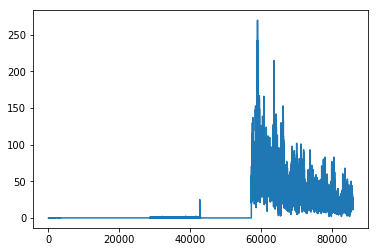

Approximation coefficient graph : 


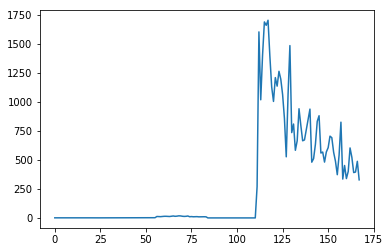

Detail coefficient graph(level = 9)


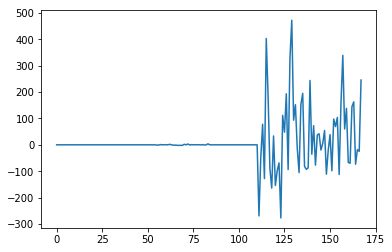

Detail coefficient graph(level = 8)


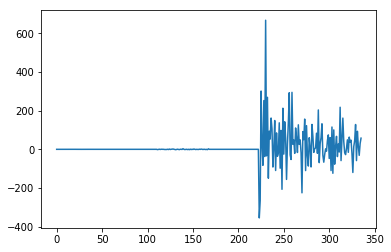

Detail coefficient graph(level = 7)


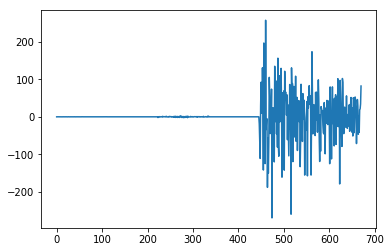

Detail coefficient graph(level = 6)


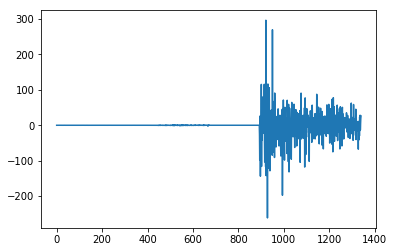

Detail coefficient graph(level = 5)


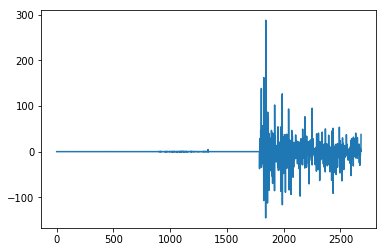

Detail coefficient graph(level = 4)


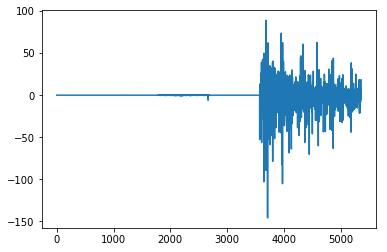

Detail coefficient graph(level = 3)


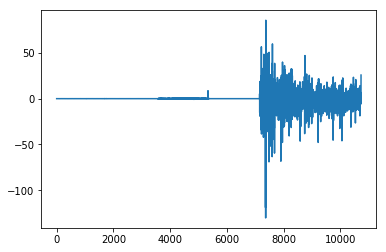

Detail coefficient graph(level = 2)


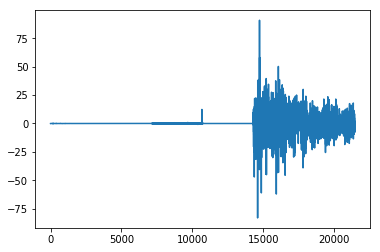

Detail coefficient graph(level = 1)


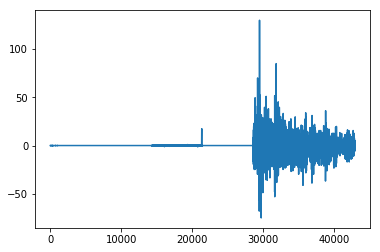

In [17]:
# coefficient 시각화
import matplotlib.pyplot as plt

# 원 소스 그래프
print("Source data graph : ")
plt.plot(wavelete_src)
plt.show()  # 차트 보여주기

# Approximation coefficient 시각화 (level=9)
print("Approximation coefficient graph : ")
plt.plot(coeffs[0])
plt.show()

# Detail coefficient 출력 (level 9부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coefficient graph(level = " + str(coeffs_len-i) + ")")
    plt.plot(coeffs[i])
    plt.show()

### Source data graph 가로축의 값은 원본 데이터를 의미함. 총 (원본 투플수) x (속성수) = 14,302개 x 6개 = 85,812개로 1차원 벡터로 표현되었다. 
### 근접계수배열은 9레벨에 대한 값이며 총 168개의 요소로 구성된다. 이것은 최고레벨인 9레벨에서는 데이터가 85,812개 데이터가 168개까지 축소가 될 수 있음을 의미함
### 그래프에서 보듯이, 레벨이 올라갈 때마다 데이터가 점점 더 희소해지며 데이터 축소의 효과가 나타남을 알 수 있음